In [1]:
import os
os.chdir('../src')

In [2]:
import pandas as pd
import plotly.express as px

from rv.datamodels.daily_movement import OneDay, DAY, TIMESTR, PRICE
from rv.datamodels.config import Config
from rv.preprocessing import prepare, prepare_minute, clean_data
from rv.utils.ts_plot import tsplot

In [3]:
df = pd.read_csv("../data/stockdata3.csv")

In [4]:
def get_minute_returns(stock_name, config):
    data = df[[DAY, TIMESTR, stock_name]].rename(columns={stock_name: PRICE})
    daily_data = prepare(data)
    daily_data = clean_data(daily_data, config.overnight_adjustment_std_multiplier, config.overnight_relative_threahold)
    return prepare_minute(daily_data)

In [6]:
configs = {
    "a": Config(0.05, 3.0, 0.05),
    "b": Config(0.05, 3.0, 0.05),
    "c": Config(0.05, 3.0, 0.05),
    "d": Config(0.05, 3.0, 0.05),
    "e": Config(0.05, 3.0, 0.05),
    "f": Config(0.005, 3.0, 0.05),
}

new_adjustment/cum_adjustment at day 9 with amount 18.86500000000001/18.86500000000001


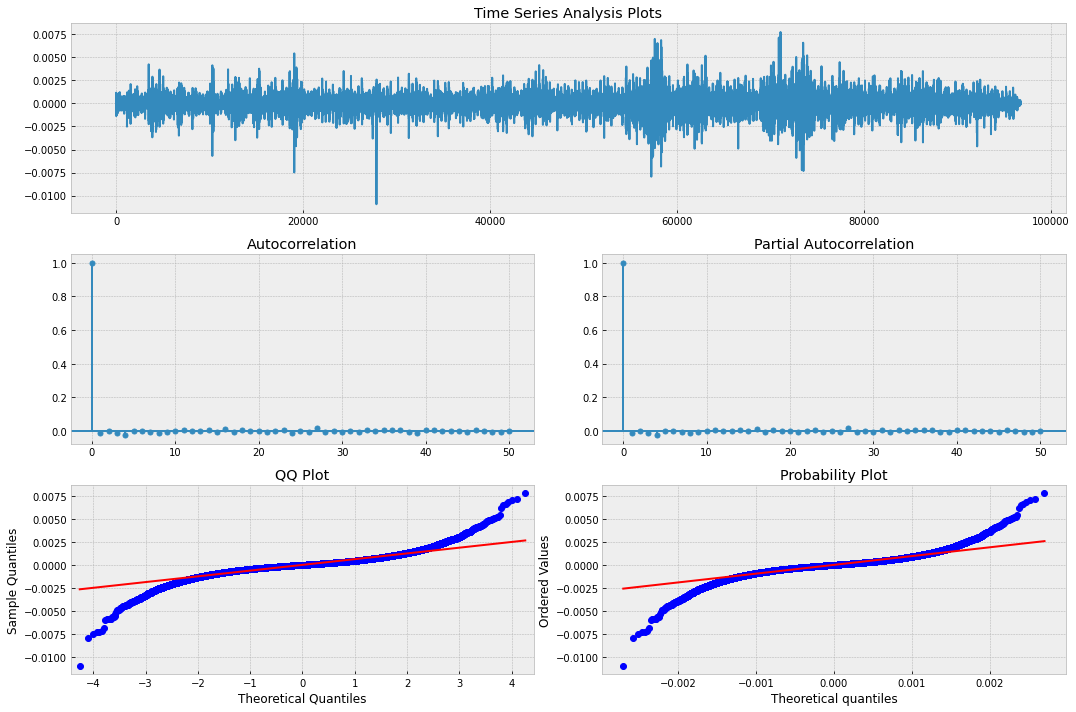

new_adjustment/cum_adjustment at day 149 with amount 0.7300000000000004/0.7300000000000004
new_adjustment/cum_adjustment at day 162 with amount -1.1899999999999995/-0.4599999999999991
new_adjustment/cum_adjustment at day 168 with amount 0.6200000000000001/0.16000000000000103
new_adjustment/cum_adjustment at day 206 with amount -0.5099999999999998/-0.34999999999999876
new_adjustment/cum_adjustment at day 209 with amount 0.4450000000000003/0.09500000000000153


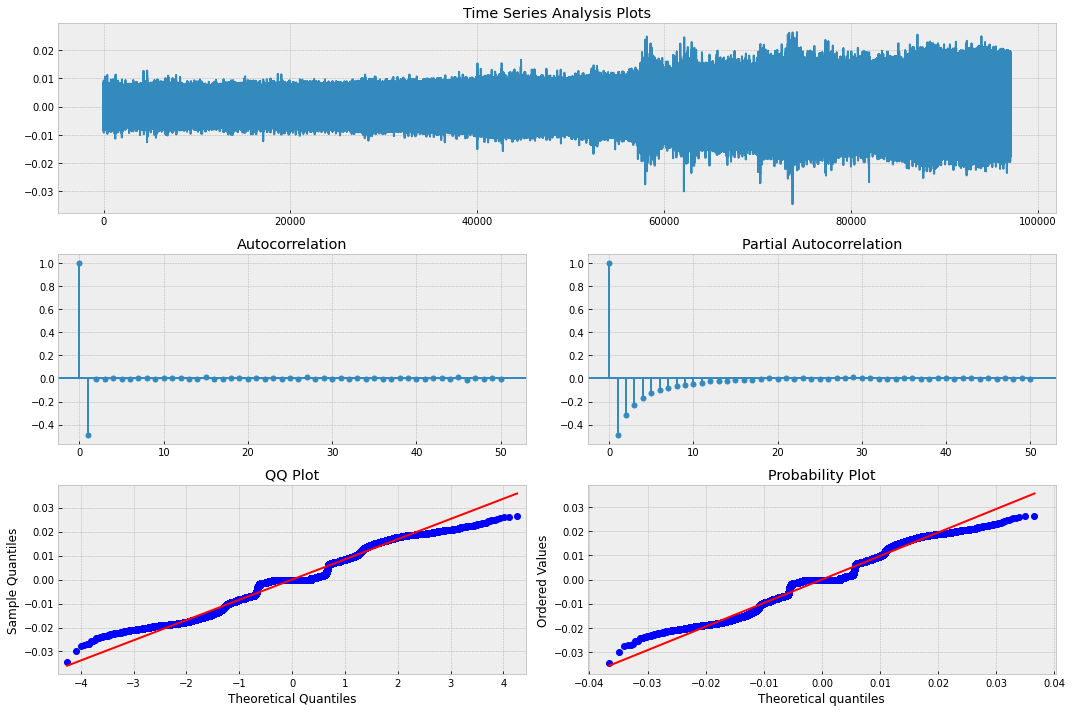

new_adjustment/cum_adjustment at day 101 with amount 51.32899999999999/51.32899999999999


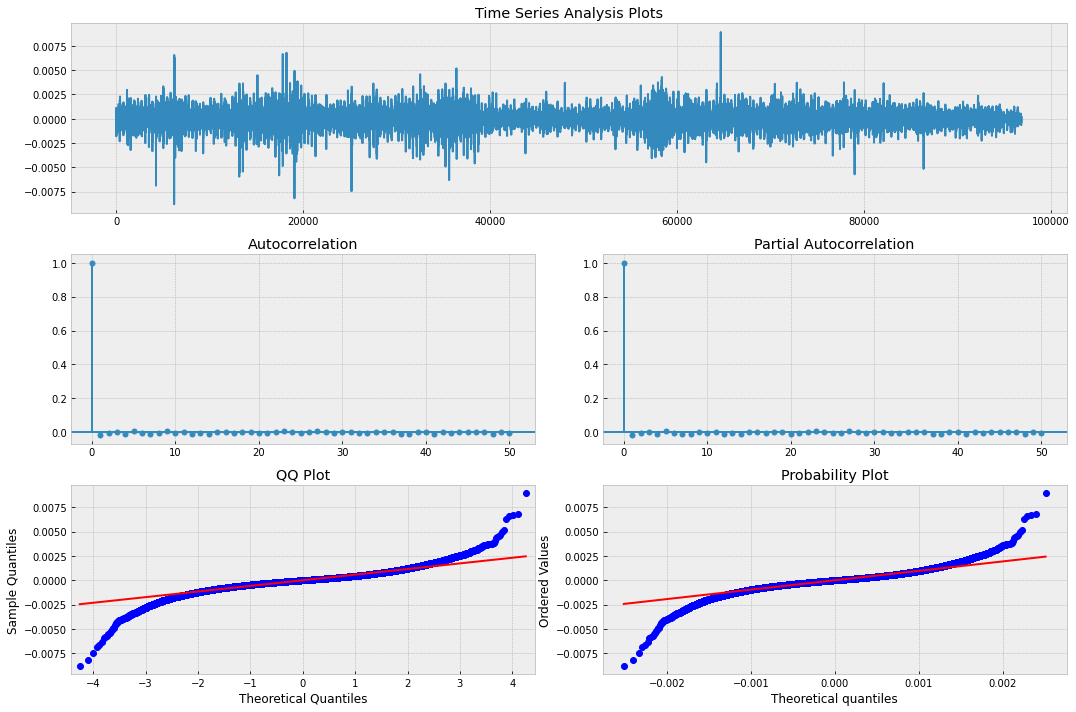

new_adjustment/cum_adjustment at day 5 with amount -4.196000000000012/-4.196000000000012
new_adjustment/cum_adjustment at day 42 with amount -5.441999999999993/-9.638000000000005
new_adjustment/cum_adjustment at day 46 with amount -4.613999999999997/-14.252000000000002
new_adjustment/cum_adjustment at day 67 with amount -5.112000000000002/-19.364000000000004
new_adjustment/cum_adjustment at day 84 with amount 3.818000000000005/-15.546
new_adjustment/cum_adjustment at day 106 with amount -3.7450000000000045/-19.291000000000004
new_adjustment/cum_adjustment at day 130 with amount -3.3329999999999984/-22.624000000000002
new_adjustment/cum_adjustment at day 169 with amount 1.720000000000006/-20.903999999999996
new_adjustment/cum_adjustment at day 184 with amount -3.471999999999994/-24.37599999999999
new_adjustment/cum_adjustment at day 202 with amount -4.892000000000003/-29.267999999999994
new_adjustment/cum_adjustment at day 206 with amount -2.2900000000000063/-31.558
new_adjustment/cum_a

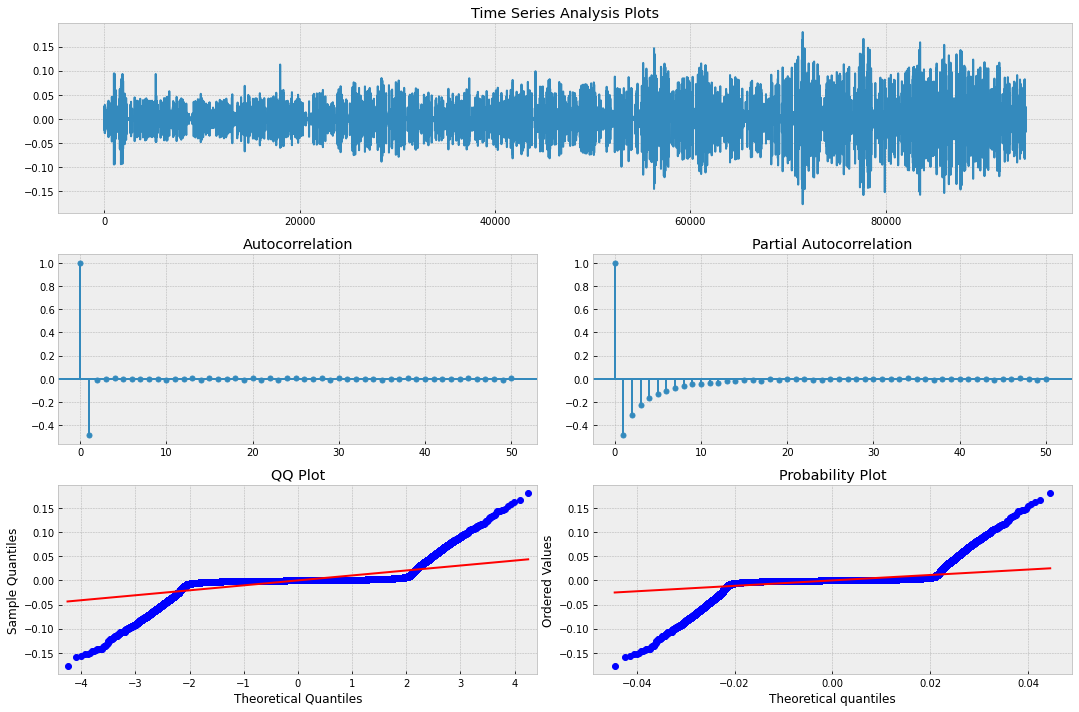

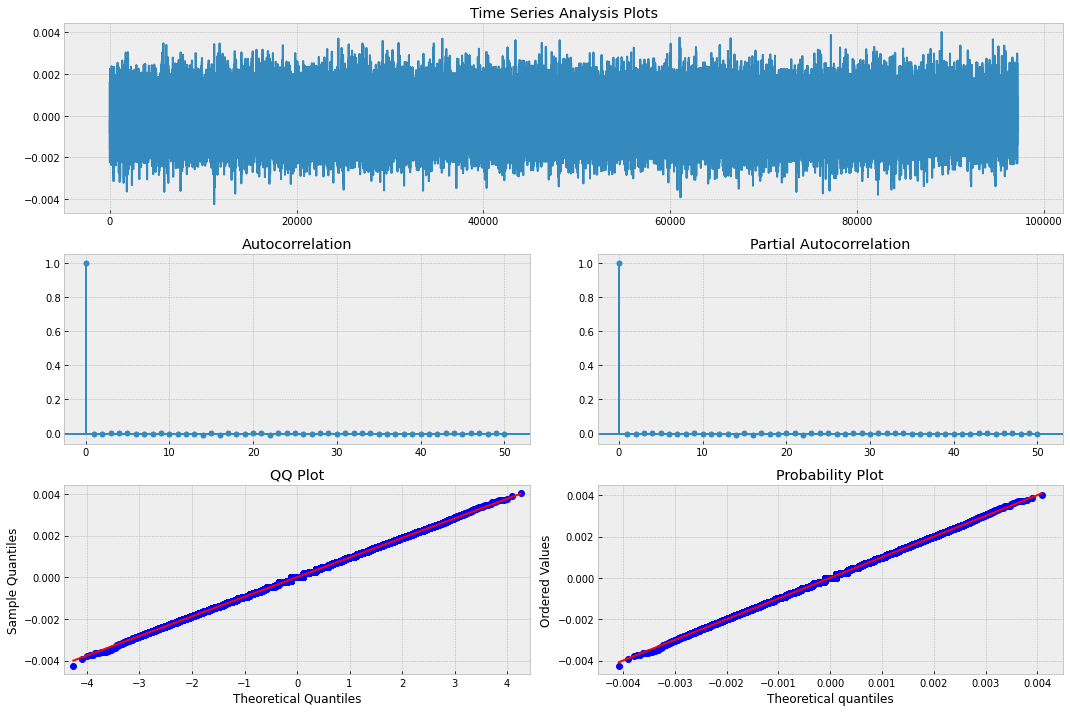

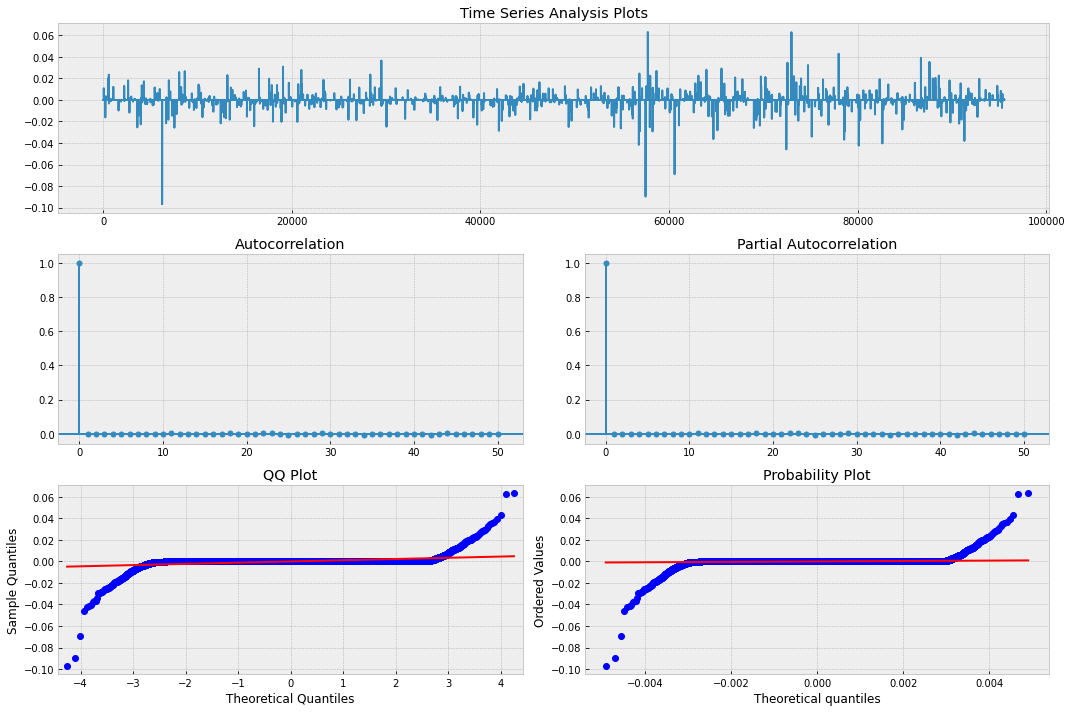

In [8]:
for stock_name in ["a", "b", "c", "d", "e", "f"]:
    config = configs[stock_name]
    minute_returns = get_minute_returns(stock_name, config)
    px.line(minute_returns)
    tsplot(minute_returns)